Importing all the necessary libraries required

In [ ]:
# Importing required libraries
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt      
import seaborn as sns
import re
import joblib
import scipy.stats as stats
from collections import defaultdict
from tqdm import tqdm
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from wordcloud import WordCloud
from warnings import filterwarnings
filterwarnings("ignore")

Uploading the dataset directly from Kaggle

In [ ]:
# Uploading the Kaggle API file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dpank09","key":"b387c443368f37ebb01c46c00c54ed90"}'}

In [ ]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Loading the dataset directly from Kaggle using its's API
!kaggle competitions download -c tmdb-box-office-prediction

 48% 5.00M/10.4M [00:01<00:01, 4.54MB/s]
100% 10.4M/10.4M [00:01<00:00, 8.94MB/s]
  0% 0.00/60.1k [00:00<?, ?B/s]
100% 60.1k/60.1k [00:00<00:00, 62.2MB/s]
  0% 0.00/7.05M [00:00<?, ?B/s]
100% 7.05M/7.05M [00:00<00:00, 64.9MB/s]


In [ ]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


Reading the Training and Test Datasets

In [ ]:
# Reading the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Understanding the Training and Test Datasets

In [ ]:
# Understanding the datasets
print("No. of columns in the dataset: ",train.shape[1])
print("No. of rows in the dataset: ",train.shape[0])

No. of columns in the dataset:  23
No. of rows in the dataset:  3000


In [ ]:
print("No. of columns in the dataset: ",test.shape[1])
print("No. of rows in the dataset: ",test.shape[0])

No. of columns in the dataset:  22
No. of rows in the dataset:  4398


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [ ]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt1790885,en,The Double,An American journalism student in London scoop...,NaN,/1kW3cUREVpmlVUiOmZmNUOYTtSi.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Joshua,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe48ee9251416c9109d00b', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


Finding the number of missing values in each column 

In [ ]:
# Finding the number of missing values in each column
train.isna().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

In [ ]:
test.isna().sum().sort_values(ascending=False)

belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22
genres                     16
overview                   14
cast                       13
runtime                     4
title                       3
status                      2
poster_path                 1
release_date                1
original_language           0
imdb_id                     0
original_title              0
popularity                  0
budget                      0
id                          0
dtype: int64

Percentage of missing values 

In [ ]:
total_na = train.isna().sum()
data_na = total_na*100/len(train)
print("% of missing data in each feature:")
data_na.sort_values(ascending=False)

% of missing data in each feature:


belongs_to_collection    79.866667
homepage                 68.466667
tagline                  19.900000
Keywords                  9.200000
production_companies      5.200000
production_countries      1.833333
spoken_languages          0.666667
crew                      0.533333
cast                      0.433333
overview                  0.266667
genres                    0.233333
runtime                   0.066667
poster_path               0.033333
original_language         0.000000
budget                    0.000000
imdb_id                   0.000000
revenue                   0.000000
original_title            0.000000
popularity                0.000000
release_date              0.000000
status                    0.000000
title                     0.000000
id                        0.000000
dtype: float64

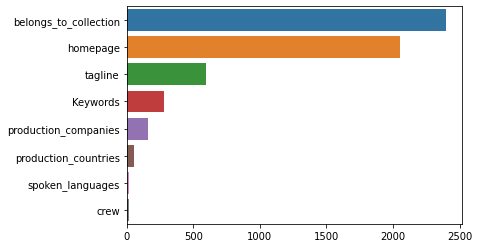

In [ ]:
# Countplot of missing values in the dataset
total_na = total_na.sort_values(ascending=False)
sns.barplot(total_na[:8], total_na[:8].index)
plt.show()

Most values are missing from 'belongs_to_collection' column

Correlation matrix

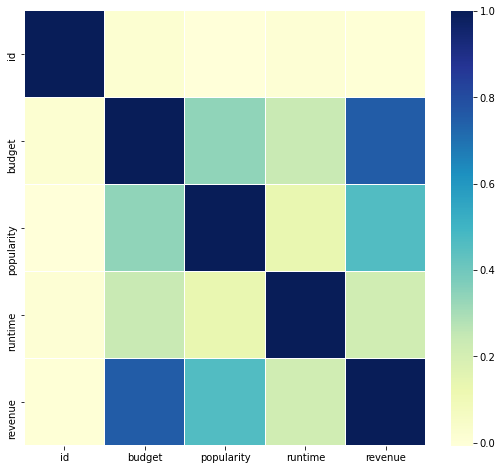

In [ ]:
# Correlation matrix
corrmat = train.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
corrmat['revenue'].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

WordCloud Plot

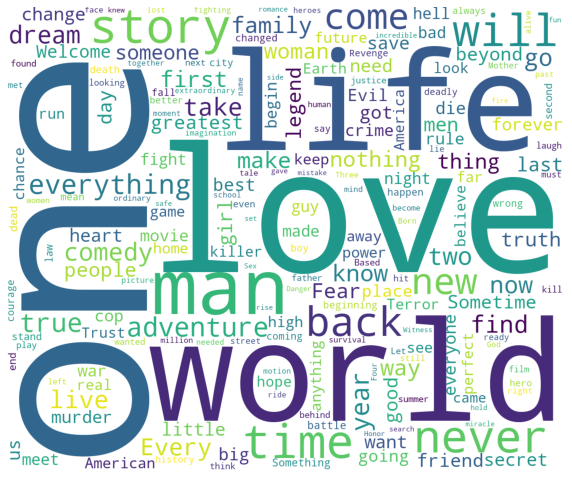

In [ ]:
# WordCloud plot
plt.figure(figsize=(10,10))
taglines=' '.join(train['tagline'].apply(lambda x:x if x is not np.nan else ''))

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(taglines)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Distribution plot of 'revenue' column

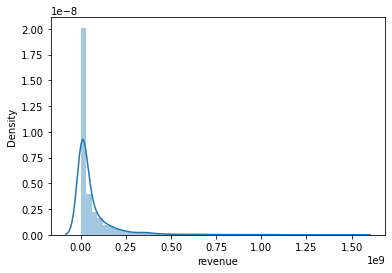

In [ ]:
# Distribution plot of 'revenue'
sns.distplot(train["revenue"])

Pairplot between columns in the dataset

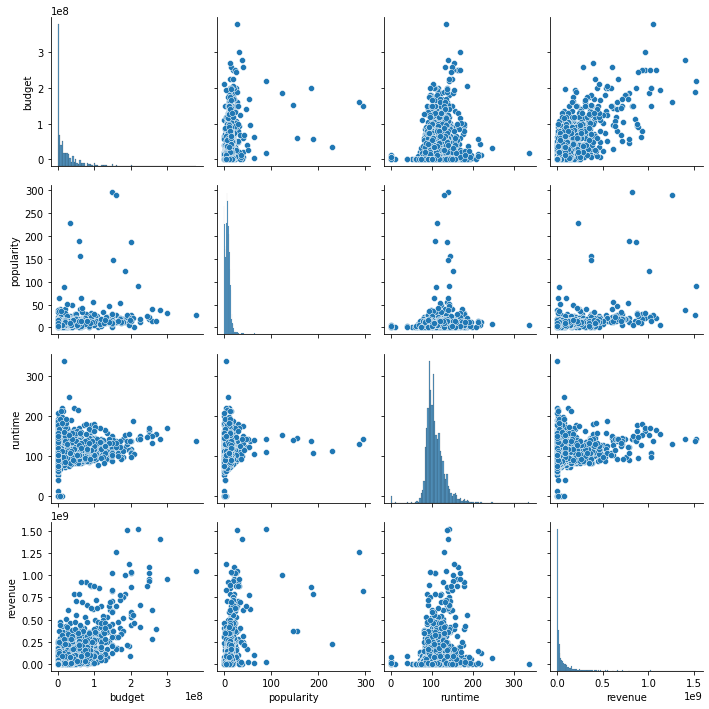

In [ ]:
# Pairplot between columns in the dataset
train_numer = train.select_dtypes(['number']).drop(['id'], axis=1).fillna(0)
sns.pairplot(train_numer)

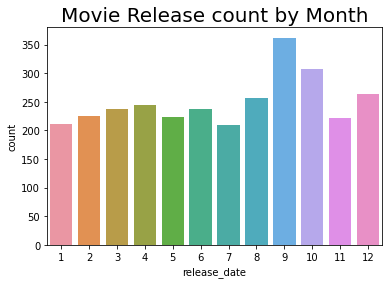

In [ ]:
# Countplot for movies released each month
release_month = train.release_date.str.extract('(\S+)/\S+/\S+', expand=False).astype(np.int16)
sns.countplot(release_month.sort_values())
plt.title("Movie Release count by Month", fontsize=20)
plt.show()

Most of the movies come out in September and October

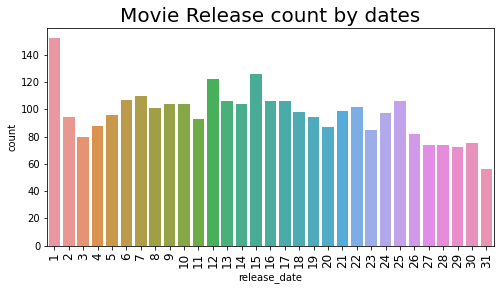

In [ ]:
# Countplot for movies released on each date
release_day = train.release_date.str.extract('\S+/(\S+)/\S+', expand=False).astype(np.int16)
plt.figure(figsize=(8,4))
sns.countplot(release_day.sort_values())
plt.title("Movie Release count by dates", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.show()

Most of the movies are released on the 1st and 15th of every month

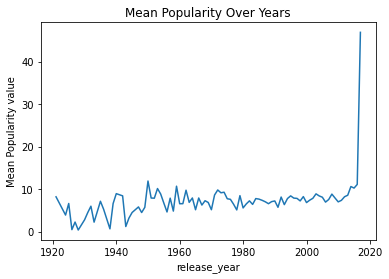

In [ ]:
# Plot to find mean popularity of movies over years
train['release_year'] = train.release_date.str.extract('\S+/\S+/(\S+)', expand=False).astype(np.int16)
train.loc[(21 <= train.release_year) & (train.release_year <= 99), 'release_year'] += 1900
train.loc[train.release_year < 21, 'release_year'] += 2000
ry_data = train.groupby(['release_year'])['budget','popularity','revenue'].mean()
fig = plt.figure(figsize=(6, 4))
ry_data['popularity'].plot(kind='line')
plt.ylabel('Mean Popularity value')
plt.title('Mean Popularity Over Years')
plt.show()

Mean Popularity of movies over years was gained nearly in the 2000s

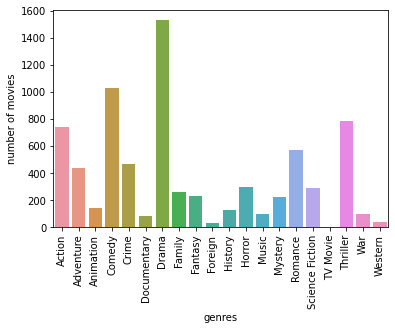

In [ ]:
# Countplot of all movies grouped by genres
train.loc[train.genres.isnull(), 'genres'] = "{}"
train['genres'] = train.genres.apply(lambda x: sorted([d['name'] for d in eval(x)])).apply(lambda x: ','.join(map(str, x)))
genres = train.genres.str.get_dummies(sep=',')
movies_by_genre = pd.DataFrame(genres.sum(axis=0)).reset_index()
movies_by_genre.columns = ['genres', 'movies']
fig = sns.barplot(x='genres', y='movies', data=movies_by_genre)
fig.set(ylabel='number of movies')
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

Most of the movies are of the genre 'Drama'

**Pre-processing of the dataset**

Dropping the redundant columns







In [ ]:
# Pre-processing

# Dropping redundant columns
dropping_cols = ['belongs_to_collection','homepage','tagline']
train.drop(dropping_cols,axis=1,inplace=True)
print(train.shape)
train.head()

(3000, 21)


,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,release_year
0,1,14000000,Comedy,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015
1,2,40000000,"Comedy,Drama,Family,Romance",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004
2,3,3300000,Drama,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014
3,4,1200000,"Drama,Thriller",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012
4,5,0,"Action,Thriller",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009


In [ ]:
dropping_cols = ['belongs_to_collection','homepage','tagline']
test.drop(dropping_cols,axis=1,inplace=True)
print(test.shape)
test.head()

(4398, 19)


,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew
0,3001,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


Checking number of missing values and dropping them

In [ ]:
# Checking number of missing values in the dataset after dropping columns
train.isna().sum().sort_values(ascending=False)

Keywords                276
production_companies    156
production_countries     55
spoken_languages         20
crew                     16
cast                     13
overview                  8
runtime                   2
poster_path               1
budget                    0
genres                    0
imdb_id                   0
original_language         0
original_title            0
release_year              0
popularity                0
revenue                   0
release_date              0
status                    0
title                     0
id                        0
dtype: int64

In [ ]:
train.dropna(inplace=True)
print(train.shape)
test.dropna(inplace=True)
print(test.shape)

(2606, 21)
(3814, 19)


Normalizing the 'revenue' column for a better distribution

In [ ]:
# Applying log to 'revenue' to normalize the distribution.
train['logrevenue'] = np.log1p(train['revenue'])

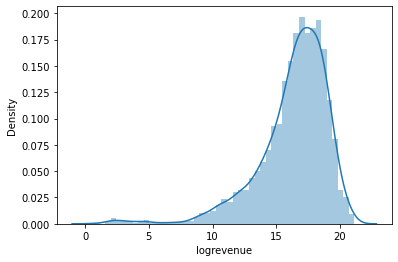

In [ ]:
sns.distplot(train['logrevenue'])

**Feature** **Engineering**

In [ ]:
# Feature engineering
train['release_date'] = pd.to_datetime(train['release_date'], infer_datetime_format=True)
train['release_day'] = train['release_date'].apply(lambda x: x.day)
train['release_weekday'] = train['release_date'].apply(lambda x: x.weekday())
train['release_month'] = train['release_date'].apply(lambda x: x.month)
train['release_year'] = train['release_date'].apply(lambda x: x.year if x.year < 2018 else x.year -100)

In [ ]:
train[['release_date','release_day','release_weekday','release_month','release_year']].head()

,release_date,release_day,release_weekday,release_month,release_year
0,2015-02-20,20,4,2,2015
1,2004-08-06,6,4,8,2004
2,2014-10-10,10,4,10,2014
8,1996-02-16,16,4,2,1996
9,2003-04-16,16,2,4,2003


In [ ]:
test['release_date'] = pd.to_datetime(test['release_date'], infer_datetime_format=True)
test['release_day'] = test['release_date'].apply(lambda x: x.day)
test['release_weekday'] = test['release_date'].apply(lambda x: x.weekday())
test['release_month'] = test['release_date'].apply(lambda x: x.month)
test['release_year'] = test['release_date'].apply(lambda x: x.year if x.year < 2018 else x.year -100)

In [ ]:
test[['release_date','release_day','release_weekday','release_month','release_year']].head()

,release_date,release_day,release_weekday,release_month,release_year
1,2058-05-19,19,6,5,1958
2,1997-05-23,23,4,5,1997
3,2010-09-04,4,5,9,2010
5,1996-02-07,7,2,2,1996
6,2010-12-23,23,3,12,2010


Mapping 'runtime' column with the 'release_year' column in test dataset

In [ ]:
# Function for mapping 'runtime' column with 'release_year' column in the test dataset
def map_runtime(df):
    df['runtime'].fillna(0)
    run = df[(df['runtime'].notnull()) & (df['runtime'] != 0)]
    year_mean = run.groupby(['release_year'])['runtime'].agg('mean')
    d = dict(year_mean)
    for i in df[df['runtime'] == 0]:
        df['runtime'] = df.loc[:, 'release_year'].map(d)
    return df
  
test = map_runtime(test)

Calculating pearson values

In [ ]:
# Calculating pearson values to find correlation for mapping
X = train[train['budget'] != 0]
for i in X.select_dtypes(include='number', exclude='datetime'):
    print(i, stats.pearsonr(X.budget, X[i]))

id (0.021414364889835388, 0.339440241646602)
budget (0.9999999999999996, 0.0)
popularity (0.29699127694635913, 7.512253162740329e-42)
runtime (0.2125390733255676, 8.82389219544887e-22)
revenue (0.7321329580936939, 0.0)
release_year (0.2710624938352254, 6.911892222636516e-35)
logrevenue (0.4986057253914758, 1.1001943100407055e-125)
release_day (0.02361995876042412, 0.29202615180473895)
release_weekday (-0.11157163034967087, 5.972222488244967e-07)
release_month (0.02010751382484594, 0.36973895528734085)


Mapping 'budget' column with 'release_year' column in train dataset

In [ ]:
# 'release_year' correlates strongly with 'budget'
# Function for mapping 'budget' with 'release_year' in train dataset
def map_budget(df):
    d = defaultdict()
    X = df[df['budget'] != 0]
    year_mean = pd.Series(X.groupby(['release_year'])['budget'].agg('mean'))
    d = dict(year_mean)
    for i in df[df['budget'] == 0]:
        df['budget'] = df.loc[:, 'release_year'].map(d)
    df.budget = df.sort_values(by='release_year').budget.fillna(method='ffill')
    return df

In [ ]:
train = map_budget(train)
train.budget.describe()

count    2.606000e+03
mean     3.176739e+07
std      1.327617e+07
min      2.500000e+05
25%      2.218276e+07
50%      3.672500e+07
75%      4.038036e+07
max      6.428481e+07
Name: budget, dtype: float64

In [ ]:
test = map_budget(test)

Train data after performing the mappings

In [ ]:
# Looking at train data after performing mapping 
train.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,release_year,logrevenue,release_day,release_weekday,release_month
0,1,4.818330e+07,Comedy,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,16.326300,20,4,2
1,2,4.120444e+07,"Comedy,Drama,Family,Romance",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,18.370959,6,4,8
2,3,3.936394e+07,Drama,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,16.387512,10,4,10
8,9,3.498643e+07,"Action,Adventure,Comedy,Family,Music",tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-02-16,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,1996,17.351454,16,4,2
9,10,4.015557e+07,"Comedy,Music",tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 97}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-04-16,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Mighty Wind,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...",18750246,2003,16.746717,16,2,4


In [ ]:
# Filling missing values in 'poster_path'
train['poster_path'].fillna(0, inplace=True)
train.loc[train['poster_path'] != 0, 'poster_path'] = 1
test['poster_path'].fillna(0, inplace=True)
test.loc[test['poster_path'] != 0, 'poster_path'] = 1

In [ ]:
# Modifying and concatenating 'genres' column 
genres = train.genres.str.get_dummies(sep=',')
train = pd.concat([train,genres],axis=1)

In [ ]:
train.drop(['genres'],axis=1,inplace=True)
train.head()

,id,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,release_year,logrevenue,release_day,release_weekday,release_month,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,4.818330e+07,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,1,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,16.326300,20,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,4.120444e+07,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,1,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,18.370959,6,4,8,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3,3.936394e+07,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,1,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,16.387512,10,4,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,3.498643e+07,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,1,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-02-16,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,1996,17.351454,16,4,2,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9,10,4.015557e+07,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,1,"[{'name': 'Castle Rock Entertainment', 'id': 97}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-04-16,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Mighty Wind,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...",18750246,2003,16.746717,16,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
genres= test.genres.str.get_dummies(sep=',')
test =pd.concat([test,genres],axis=1)

In [ ]:
test.drop(['genres'],axis=1,inplace=True)
test.shape

(3814, 98)

Dropping the unnecessary columns in train and test dataset

In [ ]:
dropping_cols = ['id','imdb_id','original_title','overview','production_companies','status','title','Keywords','cast','crew','production_countries','release_date','spoken_languages']
train.drop(dropping_cols,axis=1,inplace=True)
print(train.shape)
train.head()

(2606, 31)


,budget,original_language,popularity,poster_path,runtime,revenue,release_year,logrevenue,release_day,release_weekday,release_month,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,4.818330e+07,en,6.575393,1,93.0,12314651,2015,16.326300,20,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.120444e+07,en,8.248895,1,113.0,95149435,2004,18.370959,6,4,8,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3.936394e+07,en,64.299990,1,105.0,13092000,2014,16.387512,10,4,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,3.498643e+07,en,6.902423,1,100.0,34327391,1996,17.351454,16,4,2,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9,4.015557e+07,en,4.672036,1,91.0,18750246,2003,16.746717,16,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
dropping_cols = ['id','imdb_id','original_title','overview','production_companies','status','title','Keywords','cast','crew','production_countries','release_date','spoken_languages']
test.drop(dropping_cols,axis=1,inplace=True)
print(test.shape)
test.head()

(3814, 85)


,budget,original_language,popularity,poster_path,runtime,release_day,release_weekday,release_month,release_year,'name': 'Action'},'name': 'Action'}],'name': 'Adventure'},'name': 'Adventure'}],'name': 'Animation'},'name': 'Animation'}],'name': 'Comedy'},'name': 'Comedy'}],'name': 'Crime'},'name': 'Crime'}],'name': 'Documentary'},'name': 'Documentary'}],'name': 'Drama'},'name': 'Drama'}],'name': 'Family'},'name': 'Family'}],'name': 'Fantasy'},'name': 'Fantasy'}],'name': 'Foreign'},'name': 'Foreign'}],'name': 'History'},'name': 'History'}],'name': 'Horror'},'name': 'Horror'}],'name': 'Music'},'name': 'Music'}],'name': 'Mystery'},'name': 'Mystery'}],'name': 'Romance'},'name': 'Romance'}],'name': 'Science Fiction'},...,'name': 'Western'},'name': 'Western'}],{'id': 10402,{'id': 10749,{'id': 10751,{'id': 10752,{'id': 10769,{'id': 12,{'id': 14,{'id': 16,{'id': 18,{'id': 27,{'id': 28,{'id': 35,{'id': 36,{'id': 37,{'id': 53,{'id': 80,{'id': 878,{'id': 9648,{'id': 99,[{'id': 10402,[{'id': 10749,[{'id': 10751,[{'id': 10752,[{'id': 10769,[{'id': 12,[{'id': 14,[{'id': 16,[{'id': 18,[{'id': 27,[{'id': 28,[{'id': 35,[{'id': 36,[{'id': 37,[{'id': 53,[{'id': 80,[{'id': 878,[{'id': 9648,[{'id': 99
1,2.479200e+06,en,3.559789,1,110.600000,19,6,5,1958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3.454290e+07,en,8.085194,1,109.988636,23,4,5,1997,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4.378603e+07,fr,8.596012,1,104.636943,4,5,9,2010,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,3.040300e+07,en,8.679350,1,108.192308,7,2,2,1996,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,4.378603e+07,de,4.898882,1,104.636943,23,3,12,2010,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Modifying 'original_language' column
just_dummies = pd.get_dummies(train['original_language'])
train = pd.concat([train, just_dummies], axis=1)      
train.drop(['original_language'], inplace=True, axis=1)
print(train.shape)
train.head()

(2606, 62)


,budget,popularity,poster_path,runtime,revenue,release_year,logrevenue,release_day,release_weekday,release_month,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,ar,bn,cn,da,de,el,en,es,fa,fi,fr,he,hi,hu,id,it,ja,ko,ml,nb,nl,no,pl,pt,ro,ru,sr,sv,ta,te,tr,zh
0,4.818330e+07,6.575393,1,93.0,12314651,2015,16.326300,20,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.120444e+07,8.248895,1,113.0,95149435,2004,18.370959,6,4,8,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.936394e+07,64.299990,1,105.0,13092000,2014,16.387512,10,4,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,3.498643e+07,6.902423,1,100.0,34327391,1996,17.351454,16,4,2,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,4.015557e+07,4.672036,1,91.0,18750246,2003,16.746717,16,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
just_dummies = pd.get_dummies(test['original_language'])
test = pd.concat([test, just_dummies], axis=1)      
test.drop(['original_language'], inplace=True, axis=1)
print(test.shape)
test.head()

(3814, 121)


,budget,popularity,poster_path,runtime,release_day,release_weekday,release_month,release_year,'name': 'Action'},'name': 'Action'}],'name': 'Adventure'},'name': 'Adventure'}],'name': 'Animation'},'name': 'Animation'}],'name': 'Comedy'},'name': 'Comedy'}],'name': 'Crime'},'name': 'Crime'}],'name': 'Documentary'},'name': 'Documentary'}],'name': 'Drama'},'name': 'Drama'}],'name': 'Family'},'name': 'Family'}],'name': 'Fantasy'},'name': 'Fantasy'}],'name': 'Foreign'},'name': 'Foreign'}],'name': 'History'},'name': 'History'}],'name': 'Horror'},'name': 'Horror'}],'name': 'Music'},'name': 'Music'}],'name': 'Mystery'},'name': 'Mystery'}],'name': 'Romance'},'name': 'Romance'}],'name': 'Science Fiction'},'name': 'Science Fiction'}],...,[{'id': 878,[{'id': 9648,[{'id': 99,af,bm,bn,ca,cn,cs,da,de,el,en,es,fi,fr,he,hi,hu,id,is,it,ja,ka,ko,ml,nl,no,pl,pt,ro,ru,sr,sv,ta,te,th,tr,xx,zh
1,2.479200e+06,3.559789,1,110.600000,19,6,5,1958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.454290e+07,8.085194,1,109.988636,23,4,5,1997,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.378603e+07,8.596012,1,104.636943,4,5,9,2010,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3.040300e+07,8.679350,1,108.192308,7,2,2,1996,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,4.378603e+07,4.898882,1,104.636943,23,3,12,2010,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Index Resetting in Train and Test dataset

In [ ]:
# Resetting index in train and test dataset
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [ ]:
train.head(5)

,index,budget,popularity,poster_path,runtime,revenue,release_year,logrevenue,release_day,release_weekday,release_month,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,ar,bn,cn,da,de,el,en,es,fa,fi,fr,he,hi,hu,id,it,ja,ko,ml,nb,nl,no,pl,pt,ro,ru,sr,sv,ta,te,tr,zh
0,0,4.818330e+07,6.575393,1,93.0,12314651,2015,16.326300,20,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,4.120444e+07,8.248895,1,113.0,95149435,2004,18.370959,6,4,8,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3.936394e+07,64.299990,1,105.0,13092000,2014,16.387512,10,4,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,3.498643e+07,6.902423,1,100.0,34327391,1996,17.351454,16,4,2,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,4.015557e+07,4.672036,1,91.0,18750246,2003,16.746717,16,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head(5)

,index,budget,popularity,poster_path,runtime,release_day,release_weekday,release_month,release_year,'name': 'Action'},'name': 'Action'}],'name': 'Adventure'},'name': 'Adventure'}],'name': 'Animation'},'name': 'Animation'}],'name': 'Comedy'},'name': 'Comedy'}],'name': 'Crime'},'name': 'Crime'}],'name': 'Documentary'},'name': 'Documentary'}],'name': 'Drama'},'name': 'Drama'}],'name': 'Family'},'name': 'Family'}],'name': 'Fantasy'},'name': 'Fantasy'}],'name': 'Foreign'},'name': 'Foreign'}],'name': 'History'},'name': 'History'}],'name': 'Horror'},'name': 'Horror'}],'name': 'Music'},'name': 'Music'}],'name': 'Mystery'},'name': 'Mystery'}],'name': 'Romance'},'name': 'Romance'}],'name': 'Science Fiction'},...,[{'id': 878,[{'id': 9648,[{'id': 99,af,bm,bn,ca,cn,cs,da,de,el,en,es,fi,fr,he,hi,hu,id,is,it,ja,ka,ko,ml,nl,no,pl,pt,ro,ru,sr,sv,ta,te,th,tr,xx,zh
0,1,2.479200e+06,3.559789,1,110.600000,19,6,5,1958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3.454290e+07,8.085194,1,109.988636,23,4,5,1997,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,4.378603e+07,8.596012,1,104.636943,4,5,9,2010,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,3.040300e+07,8.679350,1,108.192308,7,2,2,1996,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,4.378603e+07,4.898882,1,104.636943,23,3,12,2010,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Training the dataset**

In [ ]:
# Training ML models
# Splitting the train data into train and development sets
X_train = train.drop(['revenue'],axis=1)
y_train = train['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("Shape of X_train is:", X_train.shape[0])
print("Shape of y_train is:", y_train.shape[0])
print("Shape of X_test is:", X_test.shape[0])
print("Shape of y_test is:", y_test.shape[0])

Shape of X_train is: 2084
Shape of y_train is: 2084
Shape of X_test is: 522
Shape of y_test is: 522


Linear Regression

In [ ]:
# Performing linear regression
lr_ = LinearRegression()
lr_.fit(X_train,y_train)
pred = lr_.predict(X_test)

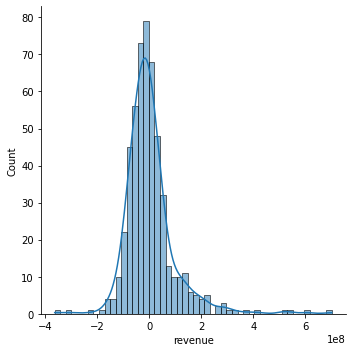

In [ ]:
# Distplot of y_test and pred difference
sns.displot((y_test-pred),bins=50,kde=True)
plt.show()

In [ ]:
# Function to find root mean square log error
def rmsle(y_true, y_pred):
    return 'rmsle', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False

Evaluating model performance

In [ ]:
# Evaluating the model performance
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('RMSLE:', rmsle(y_test, pred))

MAE: 62001443.117258124
MSE: 9542774804372852.0
RMSE: 97687127.11699967
RMSLE: ('rmsle', 1.3802791059354862, False)


In [ ]:
X_train.poster_path = X_train.poster_path.astype('category')
X_test.poster_path = X_test.poster_path.astype('category')

LightGBM

In [ ]:
# Performing LightGBM
lr = LGBMRegressor(boosting_type='dart',num_leaves=20,max_depth=-1,min_data_in_leaf=20, learning_rate=0.2,n_estimators=500,subsample_for_bin=200000,
                   class_weight=None,min_split_gain=0.0,min_child_weight=0.001,subsample=0.1,subsample_freq=0,colsample_bytree=0.75,reg_alpha=0.0,reg_lambda=0.0,
                   random_state=101,n_jobs=-1)
lr.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric=rmsle,verbose=False)
pred = lr.predict(X_test, num_iteration=lr.best_iteration_)

Evaluating model performance

In [ ]:
# Evaluating performance
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('RMSLE:', rmsle(y_test, pred))

MAE: 5309752.120443218
MSE: 225692982390759.72
RMSE: 15023081.654266534
RMSLE: ('rmsle', 1.2020982583539819, False)


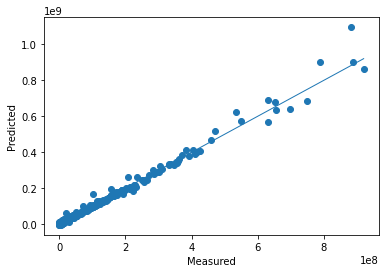

In [ ]:
# Visualizing model performance
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
print("Best scores given by:")
for key, value in (dict(lr.best_score_)).items():
  print(key,":",value)
 

Best scores given by:
valid_0 : {'l2': 225692958264340.34, 'rmsle': 1.202098258353982}


Feature Importance

In [ ]:
# Finding feature importance
lr.feature_importances_

array([ 325,  422, 1811,    0,  846,  422, 3987,  237,  169,  316,   94,
        272,   24,   46,   16,    0,  122,  167,   18,    0,    0,    6,
          0,    7,    4,  104,    0,   23,    2,    0,    0,    0,    0,
          0,    0,    0,   58,    1,    0,    0,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [ ]:
lr.n_estimators

500

Comparison in RMSE between Linear Regression and LightGBM

In [ ]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparison "
ptable.field_names = ['S.no', 'Model Name', 'Root Mean Squared Log Error']
ptable.add_row(["1","Linear Regression","1.380279105935"])
ptable.add_row(["2","LightGBM","1.2020982583"])
print(ptable)

+--------------------------------------------------------+
|                    Model Comparison                    |
+------+-------------------+-----------------------------+
| S.no |     Model Name    | Root Mean Squared Log Error |
+------+-------------------+-----------------------------+
|  1   | Linear Regression |        1.380279105935       |
|  2   |      LightGBM     |         1.2020982583        |
+------+-------------------+-----------------------------+
